Read The Dataset


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Separate X and Y

In [3]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [4]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Separate Cat and Con for X

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

[]

In [10]:
con

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

Preprocessing for X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [13]:
pre = ColumnTransformer([('num', num_pipe, con)]).set_output(transform='pandas')


In [14]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__battery_power,num__blue,num__clock_speed,num__dual_sim,num__fc,num__four_g,num__int_memory,num__m_dep,num__mobile_wt,num__n_cores,num__pc,num__px_height,num__px_width,num__ram,num__sc_h,num__sc_w,num__talk_time,num__three_g,num__touch_screen,num__wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=30)

In [16]:
xtrain.head()

,num__battery_power,num__blue,num__clock_speed,num__dual_sim,num__fc,num__four_g,num__int_memory,num__m_dep,num__mobile_wt,num__n_cores,num__pc,num__px_height,num__px_width,num__ram,num__sc_h,num__sc_w,num__talk_time,num__three_g,num__touch_screen,num__wifi
1572,-0.781953,-0.990050,-1.253064,0.981177,0.389484,-1.043966,-0.884535,-0.699686,0.671107,1.521249,0.673534,-1.170032,0.748648,0.920077,-1.259796,-1.324131,-1.283457,-1.786861,-1.006018,0.986097
1442,-0.604401,-0.990050,-1.253064,0.981177,0.159088,-1.043966,1.155024,-0.006069,1.575296,0.209639,-0.481048,-1.217365,-1.535591,-0.242713,0.164641,0.971917,0.913303,-1.786861,0.994018,-1.014099
1516,-0.358560,1.010051,0.463042,0.981177,2.002254,0.957886,0.548669,-1.393304,-1.109017,1.084046,1.168355,-1.266951,-1.007925,0.305947,-1.259796,-0.405712,-0.734267,0.559641,-1.006018,-1.014099
259,0.729514,1.010051,0.095305,0.981177,0.389484,0.957886,-1.435767,-0.006069,0.614595,0.646842,1.168355,-1.050574,0.711619,1.132164,-0.784983,-1.094526,-1.466521,0.559641,0.994018,0.986097
945,-0.925360,-0.990050,-0.517590,-1.019184,-0.992890,0.957886,0.769162,-0.699686,-1.335064,0.646842,-1.635631,0.394194,0.264954,1.099889,-1.022389,-1.324131,1.462493,0.559641,0.994018,-1.014099


In [17]:
ytrain.head()

,price_range
1572,2
1442,1
1516,1
259,3
945,3


In [18]:
xtest.head()

,num__battery_power,num__blue,num__clock_speed,num__dual_sim,num__fc,num__four_g,num__int_memory,num__m_dep,num__mobile_wt,num__n_cores,num__pc,num__px_height,num__px_width,num__ram,num__sc_h,num__sc_w,num__talk_time,num__three_g,num__touch_screen,num__wifi
1856,1.246235,-0.990050,1.321096,-1.019184,0.389484,-1.043966,-0.994781,1.727974,-0.713434,-0.227564,0.838474,-0.065607,-0.785749,0.842619,1.351672,-1.324131,0.547176,0.559641,-1.006018,-1.014099
364,-0.734151,1.010051,1.321096,-1.019184,-0.992890,-1.043966,0.217930,-0.699686,1.547040,-0.227564,0.343653,-1.030289,-0.600603,-0.603261,0.164641,-1.324131,0.547176,-1.786861,0.994018,-1.014099
1948,-1.116570,-0.990050,-0.149853,-1.019184,-0.992890,-1.043966,-0.388426,1.727974,-0.854714,1.084046,0.673534,-1.255681,-1.255557,-0.138514,1.114266,-0.176107,0.364113,-1.786861,0.994018,0.986097
1458,0.294739,-0.990050,-1.253064,-1.019184,1.311067,0.957886,0.548669,-1.046495,-1.391576,-1.539175,1.663176,0.590286,-0.755663,-0.492607,-0.072765,-1.324131,0.547176,0.559641,-1.006018,-1.014099
609,-0.060364,-0.990050,1.321096,-1.019184,-0.762495,0.957886,0.769162,-0.699686,-1.080761,-0.227564,-0.316108,-0.076877,1.072654,0.115068,0.402047,-0.635317,-1.283457,0.559641,0.994018,0.986097


In [19]:
ytest.head()

,price_range
1856,3
364,0
1948,1
1458,1
609,2


In [20]:
xtrain.shape

(1600, 20)

In [21]:
ytrain.shape

(1600, 1)

In [22]:
xtest.shape

(400, 20)

In [23]:
ytest.shape

(400, 1)

Create a Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1, min_samples_split=3, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=3)

In [25]:
model.score(xtrain, ytrain)

0.490625

In [26]:
model.score(xtest, ytest)

0.5375

Hyperparameter Tuning

Optimize the hyperparameters i.e. max_depth, min_samples_split, min_samples_leaf, criterion

In [27]:
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11],
          'min_samples_split': [5,6,7,8,9,10],
          'min_samples_leaf': [5,6,7,8,9,10],
          'criterion': ['gini','entropy']}

In [28]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 8,
 'min_samples_split': 10}

In [30]:
gscv.best_score_

0.8475787288021728

In [31]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=8,
                       min_samples_split=10)

Check accuracy score in train and test

In [32]:
best_dtc.score(xtrain, ytrain)

0.935625

Predict the results for train and test

In [33]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [34]:
ypred_tr[0:5]

array([2, 0, 2, 3, 3], dtype=int64)

In [35]:
ytrain.head()

,price_range
1572,2
1442,1
1516,1
259,3
945,3


In [36]:
ytest.head()

,price_range
1856,3
364,0
1948,1
1458,1
609,2


Plot The Confusion Matrix for Test Data

In [37]:
best_dtc.classes_

array([0, 1, 2, 3], dtype=int64)

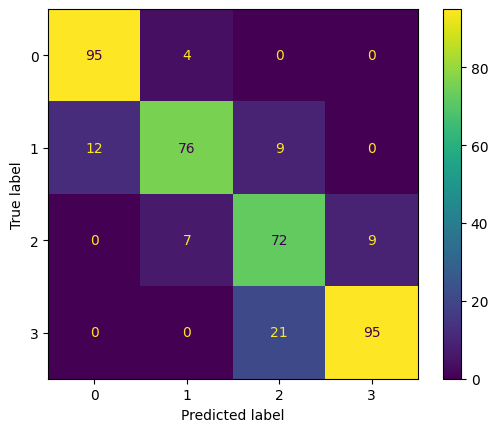

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

Print the classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.87      0.78      0.83        97
           2       0.71      0.82      0.76        88
           3       0.91      0.82      0.86       116

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.84       400
weighted avg       0.85      0.84      0.85       400



Plotting the decision tree

TypeError: can only concatenate str (not "numpy.int64") to str

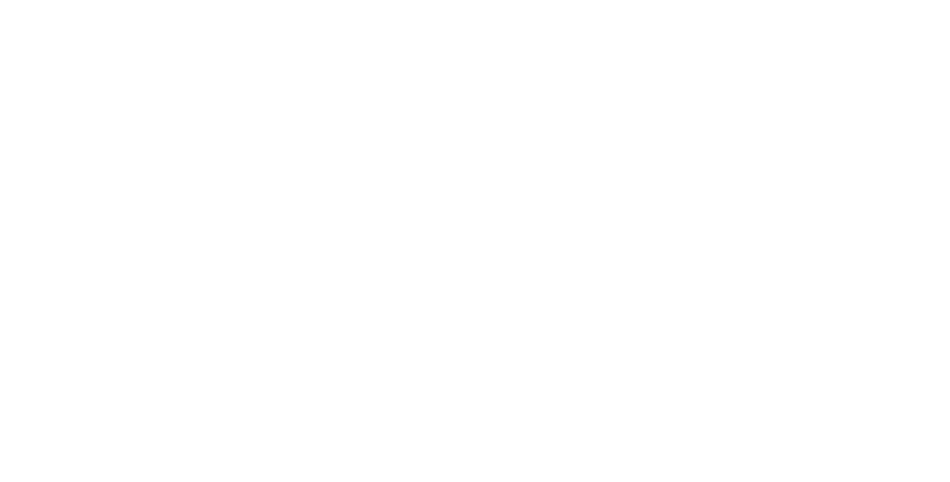

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#class_names_str = [str(class_name) for class_name in best_dtc.classes_]
plt.figure(figsize=(12, 6))
plot_tree(best_dtc, filled=True, feature_names=xtrain.columns, class_names=best_dtc.classes_)
plt.show()